In [2]:
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#alternative to cv2.imshow(image), cv2.waitKey(10),cv2.destroyAllWindows(); as these are hanging
def imshow(image):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))


In this Notebook, I work on

- Loading and displaying an image and its dimensions
- Accessing individual pixels
- Array slicing and cropping i.e Extracting “regions of interest” (ROIs)
- Resizing images
- Rotating an image and Bound rotating an image
- Smoothing(Blurring) an image
- Drawing on an image
    - Rectangle
    - Circle
    - line
    - text


In [35]:
file = './pic.PNG'
image = cv2.imread(file)
image.shape

(780, 588, 3)

### image dimensions usually will be width x height  i.e 588 x 780; 
### cv2 reads height x width 

In [18]:
(height, width, depth) = image.shape

# height = no. of rows
# width  = no. of columns
# depth  = no. of channles

In [19]:
print('height = {}, width = {}, depth = {}'.format(height, width, depth))

height = 780, width = 588, depth = 3


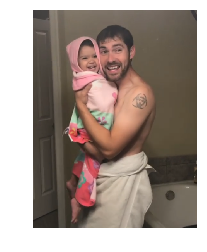

In [20]:
imshow(image)

In [21]:
(B, G, R) = image[160,132]

### Extracting “regions of interest” (ROIs)

Done as Array slicing is with the format:
- image[startY:endY, startX:endX]

> Since we are trying to access/manipulate numpy array, we use (y,x) rather than (x,y) 

This code grabs “regions of interest” (ROIs) which we then display

In [25]:
roi = image[132:217,160:245]

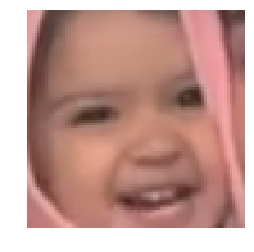

In [26]:
imshow(roi)

### Resizing images is important for a number of reasons. 
- First, you might want to resize a large image to fit on your screen. 
- Image processing is also faster on smaller images because there are fewer pixels to process. 
- In the case of deep learning, we often resize images, ignoring aspect ratio, so that the volume fits into a network which requires that an image be square and of a certain dimension.

2 ways 
- resize ignoring aspect ratio. but image may now be distorted because we didn’t take into account the aspect ratio
- calculate the aspect ratio of the original image and use it to resize an image so that it doesn’t appear squished and distorted
    - Can do step by step or use a existing method from imutils library

In [44]:
resized = cv2.resize(image, (200,200))

(200, 200, 3)

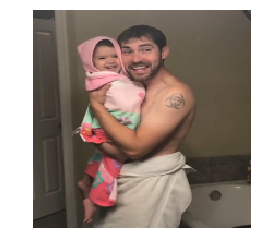

In [46]:
imshow(resized)
resized.shape

# Figure looks streched. It is so as the aspect ratio is changed. We have 2 alternative methods.

In [48]:
#1. either reduce the shape by 2/3/n times like below
resized_1 = cv2.resize(image, (int(width/4),int(height/4)))

(195, 147, 3)

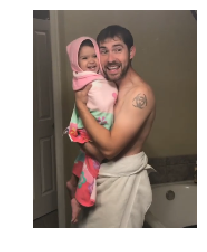

In [51]:
imshow(resized_1)
resized_1.shape

In [56]:
#2. keep the aspect ratio same using below method
ratio = 200/width
dimension = (200, int(height * ratio))
resized_2 = cv2.resize(image,dimension)

(265, 200, 3)

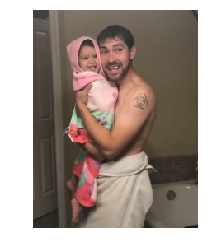

In [57]:
imshow(resized_2)
resized_2.shape

(265, 200, 3)

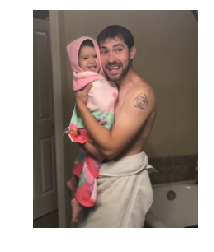

In [87]:
#using imutils.resize will take aspect ratio into account as well
resized_3 = imutils.resize(image,width=200)
imshow(resized_3)
resized_3.shape

### Rotating an image

Rotating an image about the center point requires that 
- we first calculate the center (x, y)-coordinates of the image
    - Note: We use //  to perform integer math (i.e., no floating point values).
- we then calculate a rotation matrix, M.  ***positive angles are counterclockwise and negative angles are clockwise.***
- From there we warp the image using the matrix (effectively rotating it)

###### Can do step by step or use a existing rotate method from imutils library

> OpenCV doesn’t care if our image is clipped and out of view after the rotation.

###### use imutils.rotate_bound to avoid clipped image

In [79]:
center = (width//2, height//2)
AffineMatrix = cv2.getRotationMatrix2D(center,45,1)
rotated = cv2.warpAffine(image,AffineMatrix,(width, height))

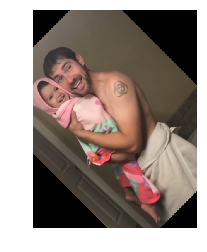

In [80]:
imshow(rotated)

In [81]:
rotated = imutils.rotate(image, -45)

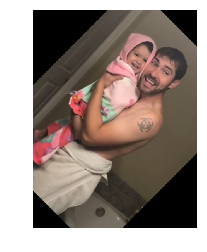

In [82]:
imshow(rotated)

In [84]:
bound_rotate = imutils.rotate_bound(image, 45)

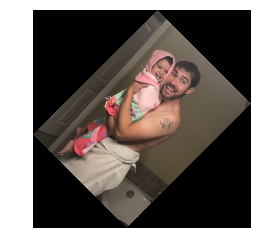

In [85]:
imshow(bound_rotate)

#### Smoothing an image

In many image processing pipelines, ***we must blur an image to reduce high-frequency noise,*** _making it easier for our algorithms to detect and understand the actual contents of the image rather than just noise that will “confuse” our algorithms._ 

Blurring an image is very easy in OpenCV and there are a number of ways to accomplish it.
- we often use the GaussianBlur  function, different functions available
- Larger kernels would yield a more blurry image. Smaller kernels will create less blurry images.

In [89]:
#Blurring/smoothing
blurred = cv2.GaussianBlur(image,(11,11),0)

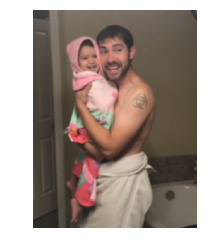

In [90]:
imshow(blurred)

### Drawing on an image

> ***drawing operations on images are performed in-place.*** 

Therefore at the beginning of each code block, we make a copy of the original image storing the copy. We then proceed to draw on the copy in-place so we do not destroy our original image.


In [154]:
img = image.copy()

#### Drawing rectangles

Drawing rectangles in OpenCV couldn’t be any easier. Following are parameters to the cv2.rectangle 

    img : The destination imThe age to draw upon.
    pt1 : Our starting pixel coordinate which is the top-left.
    pt2 : The ending pixel — bottom-right.
    color : BGR tuple. ex. To represent red, it is (0 , 0, 255) .
    thickness : Line thickness (a negative value will make a solid rectangle).

> Since we are using OpenCV’s functions rather than NumPy operations we can supply our coordinates in (x, y) order rather than (y, x) since we are not manipulating or accessing the NumPy array directly — OpenCV is taking care of that for us

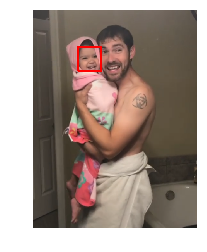

In [155]:
#Rectangle
#img = image.copy()
cv2.rectangle(img,(160,132),(245,217),(0,0,255),6)
imshow(img)

### drawing circle
To draw a circle, you need to supply following parameters to cv2.circle :

    img : The destination imThe age to draw upon.
    center : Our circle’s center coordinate. 
    radius : The circle radius in pixels. 
    color : Circle color. 
    thickness : The line thickness. Since I supplied a negative value ( -1 ), the circle is solid/filled in.


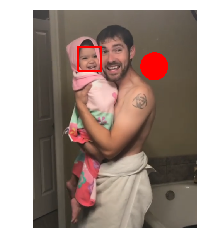

In [156]:
#img = image.copy()
cv2.circle(img,(434,201),50,(0,0,255),-1)
imshow(img)

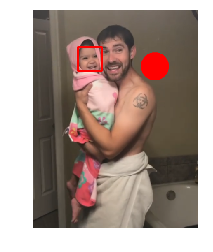

In [157]:
imshow(imutils.resize(img,width=400))

### Drawing a line

> ***Similar to that of rectangle***

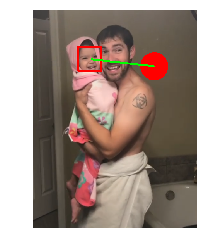

In [158]:
#img = image.copy()
cv2.line(img,(209,176),(434,201),(0,255,0),5)
imshow(img)

### Text on image

Oftentimes you’ll find that you want to overlay text on an image for display purposes. 
- If you’re working on face recognition you’ll likely want to draw the person’s name above their face. Or 
- if you advance in your computer vision career you may build an image classifier or object detector.

In these cases, you’ll find that you want to draw text containing the class name and probability.


The **putText** function of OpenCV is responsible for drawing text on an image. Let’s take a look at the required parameters:

    img : The output image.
    text : The string of text we’d like to write/draw on the image.
    pt : The starting point for the text.
    font : cv2.FONT_(tab can help); I often use the cv2.FONT_HERSHEY_SIMPLEX .
    scale : Font size multiplier.
    color : Text color.
    thickness : The thickness of the stroke in pixels.



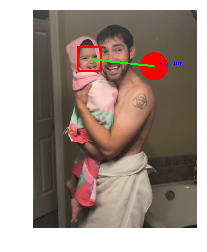

In [159]:
cv2.putText(img,"Nano..!!!!",(434,201),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),1)
imshow(img)

In [160]:
cv2.imwrite("edited.png",img)

True